<a href="https://colab.research.google.com/github/peter-callahan/vanderbilt/blob/main/Week_8_Homework_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://www.cs.toronto.edu/~frossard/post/linear_regression/


# Data + Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data_ft = pd.read_csv('https://raw.githubusercontent.com/peter-callahan/vanderbilt/main/food_truck_data.txt', header=None, names=['pop', 'profit'])
data_hp = pd.read_csv('https://raw.githubusercontent.com/peter-callahan/vanderbilt/main/housing_price_data.txt', header=None, names=['size', 'bedrm', 'price'])

# Linear Regression with Single Variable

The model uses a simple (single variable) least-square method to fit the line the data points. This solution heavily relys on the code from class, specifically the pattern of: sum error, update gradients, repeat.  I have plotted a traditional OLS alongside the Gradient Descent (few vs many iteration) to observe the change fit of the line. 

1. Dataset: food truck 
2. Input parameters: population
3. Y Variable: profits

Profit = Theta0 + Theta1 * population

1. Theta1 = -14.559814388642172,
2. Theta0 = 2.5

In [4]:
def simple_reg_single_step(training_pair, thetas, x0=1.0):
    
    x1 = training_pair[0]
    y = training_pair[1]

    # do one forward pass with a single training example
    # to calculate error and gradient
    y_hat = thetas[0] + thetas[1] * x1
    error = y_hat - y

    # cost = 0.5 * (error ** 2)

    # for each theta, we need the gradient for an update
    gradients = np.array([error * x0, error * x1])

    # gradients[0] is error term for x0
    # gradients[1] is same for x1
    return gradients


def gradient_descent(training_data, thetas, alpha=5e-3, model=simple_reg_single_step):
    total_error = 0
    overall_gradients = np.zeros(training_data.shape[1])

    # compute the summation of gradients across all training examples
    for ex in training_data:
        gradients = model(ex, thetas)

        total_error = total_error + gradients[0]
        overall_gradients = overall_gradients + gradients

    # update thetas
    # theta_0, theta_1 = thetas
    # thetas[0] = theta_0 - alpha * overall_gradients[0]
    # thetas[1] = theta_1 - alpha * overall_gradients[1]

    for n in range(0, len(thetas)):
        thetas[n] = thetas[n] - alpha * overall_gradients[n]

    return thetas, total_error

def ols(data):
    # initializing our inputs and outputs
    X = data.iloc[0].values
    Y = data.iloc[1].values

    # mean of our inputs and outputs
    x_mean = np.mean(X)
    y_mean = np.mean(Y)

    #total number of values
    n = len(X)

    # using the formula to calculate the b1 and b0
    numerator = 0
    denominator = 0

    for i in range(n):
        numerator = numerator + (X[i] - x_mean) * (Y[i] - y_mean)
        denominator = denominator + (X[i] - x_mean) ** 2
        
    b1 = numerator / denominator
    b0 = y_mean - (b1 * x_mean)

    return [b0, b1]

## Training

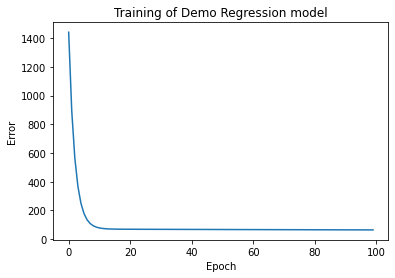

In [5]:
thetas = [0.3, 2.5]

ft_array = np.array(data_ft)

total_epochs = 100
error_traj = [0] * total_epochs

for epoch in range(total_epochs):
    thetas, epoch_error = gradient_descent(ft_array, 
                                           thetas, 
                                           alpha=0.00005, 
                                           model=simple_reg_single_step)

    # store a history of errors
    error_traj[epoch] = epoch_error

plt.plot(error_traj)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Training of Demo Regression model');

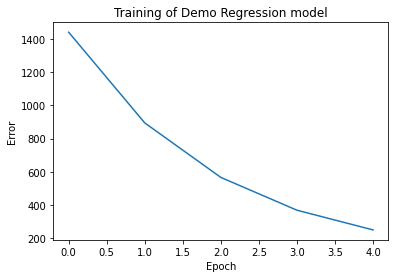

In [6]:
thetas_2 = [0.3, 2.5]

ft_array = np.array(data_ft)

total_epochs = 5
error_traj = [0] * total_epochs

for epoch in range(total_epochs):
    thetas_2, epoch_error = gradient_descent(ft_array,  
                                             thetas_2, 
                                             alpha=0.00005, 
                                             model=simple_reg_single_step)

    error_traj[epoch] = epoch_error

plt.plot(error_traj)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Training of Demo Regression model');

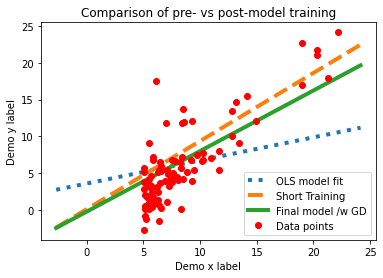

In [7]:
lin_pts = np.linspace(ft_array[:,1].min(), 
                      ft_array[:,1].max(), 
                      25) # for making the line

# lin_pts = ft_array[:,1]

# set initial parameters
old_thetas = ols(data_ft)

orig_mdl_pts = old_thetas[0] + lin_pts * old_thetas[1]
plt.plot(lin_pts, orig_mdl_pts, ':', linewidth=4, label='OLS model fit')
plt.legend()

mdl_pts_2 = thetas_2[0] + lin_pts * thetas_2[1]
plt.plot(lin_pts, mdl_pts_2, '--', linewidth=4, label='Short Training')
plt.legend()

mdl_pts = thetas[0] + lin_pts * thetas[1]
plt.plot(lin_pts, mdl_pts, linewidth=4, label='Final model /w GD')
plt.legend()

plt.plot(ft_array[:,0], ft_array[:,1], 'ro', label='Data points') # 'ro' for red, circle
plt.legend()
plt.xlabel('Demo x label')
plt.ylabel('Demo y label')
plt.title('Comparison of pre- vs post-model training');

In [8]:
thetas

[-0.208901663618831, 0.8226466361640565]

# Linear Regression with Multiple Variable

The model uses a multi variable regression to predict the price of a house using variables like bedooms and size. This solution is based off a simple linear regression but designed to handle mutliple variables and thetas. I have plotted the cost curve for scaled and unscaled data, both show convergence but notabily the alpha used for the scaled data was much smaller.  I interpret this to mean that with scaled data the gradient descent is able to converge more quickly with larger steps, without encountering gradient descent divergence.   

1. Dataset: Housing Prices
2. Input parameters: size (of house) and bedrm (number of bedrooms)
3. Y Variable: price (of house)

Price = Theta0 + Theta1 * size + Theta2 * bedrooms

1. Theta1 = -1.6686245507990487, 
2. Theta2 = 1.6046409176607257, 
3. Theta0 = 3.0
  

In [9]:
data_hp.head()

,size,bedrm,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [10]:
def multi_reg_single_step(training_pair, thetas, x0=1.0):

    x1 = training_pair[0]
    x2 = training_pair[1]
    y = training_pair[2]

    # do one forward pass with a single training example
    # to calculate error and gradient

    y_hat = thetas[0] + thetas[1] * x1 + thetas[2] * x2
    error = y_hat - y

    cost = 0.5 * (error ** 2)

    # for each theta, we need the gradient for an update
    gradients = np.array([error * x0, error * x1, error * x2])

    # gradients[0] is error term for x0
    # gradients[1] is same for x1
    return gradients

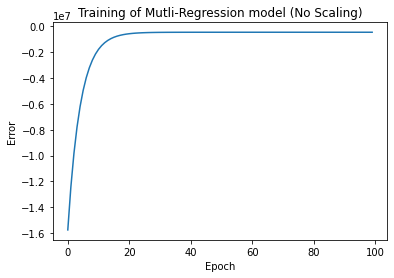

In [11]:
thetas = [0.3, 2.5, 3.0]

data_array = np.array(data_hp)

total_epochs = 100
error_traj1 = [0] * total_epochs

for epoch in range(total_epochs):
    thetas, epoch_error = gradient_descent(data_array, 
                                           thetas, 
                                           alpha = 0.000000001, 
                                           model=multi_reg_single_step)

    # store a history of errors
    error_traj1[epoch] = epoch_error

plt.plot(error_traj1)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Training of Mutli-Regression model (No Scaling)');

## Perform Scaling and Retrain

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# data_hp[['size', 'bedrm']] = scaler.fit_transform(data_hp[['size', 'bedrm']])

In [13]:
data_hp_scaled = pd.DataFrame(scaler.fit_transform(data_hp), 
                                      columns=['size', 'bedrm', 'price'])
                            

In [14]:
data_hp_scaled.head(3)

,size,bedrm,price
0,0.345284,0.5,0.433962
1,0.206288,0.5,0.301887
2,0.426917,0.5,0.375660


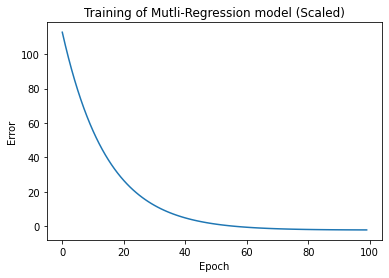

In [15]:
thetas = [0.3, 2.5, 3.0]

data_array = np.array(data_hp_scaled)

total_epochs = 100
error_traj2 = [0] * total_epochs

for epoch in range(total_epochs):
    thetas, epoch_error = gradient_descent(data_array, 
                                           thetas, 
                                           alpha=0.001, 
                                           model=multi_reg_single_step)

    # store a history of errors
    error_traj2[epoch] = epoch_error

plt.plot(error_traj2)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Training of Mutli-Regression model (Scaled)');

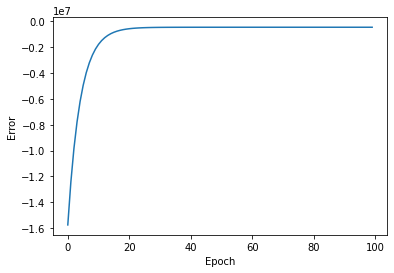

In [16]:
# plt.plot(error_traj)
plt.plot(error_traj1)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show();

In [17]:
thetas

[-1.1836265692581043, 1.6080108493852967, 1.75040648792775]